In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [21]:
# Read the CSV file
df = pd.read_csv('sim1.csv')
tasklog = pd.read_csv('project_files/tasklog_time_adjusted_trunc.csv')

df['appear_time']=tasklog['TIME']
df.to_csv('sim1_predict_ver.csv')
#location column
loc = df.columns[0]
#print(df)
duplicate_counts = df.groupby(loc).size().reset_index(name="count")
# Filter to only show locations with 3 or more occurrences
duplicates = duplicate_counts[duplicate_counts['count'] >= 3]

# Sort by count in descending order
duplicates = duplicates.sort_values('count', ascending=False)

print(duplicates)
target_locs = duplicates['location'].to_list()
# print(df_filtered)
# print(type(df_filtered))
filtered_data = df[df['location'] == 43]
print(filtered_data)

    location  count
16        43      7
18        45      7
17        44      6
19        46      4
20        48      4
22        52      4
1         15      3
7         33      3
12        38      3
23        53      3
28        63      3
29        71      3
    location                appear_time  reward
4         43  2012-04-03 18:03:00+00:00       5
13        43  2012-04-03 18:09:29+00:00       9
28        43  2012-04-03 18:15:05+00:00       8
34        43  2012-04-03 18:17:17+00:00       7
38        43  2012-04-03 18:19:21+00:00       6
59        43  2012-04-03 18:35:31+00:00       7
67        43  2012-04-03 18:42:03+00:00       8


/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:14 - cmdstanpy - INFO - Chain [1] start proces

19:12:14 - cmdstanpy - INFO - Chain [1] done processing


43
                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:03:00  6.507627    4.858135    8.261111
1 2012-04-03 18:09:29  6.831315    5.037786    8.520887
2 2012-04-03 18:15:05  7.110901    5.390873    8.885813
3 2012-04-03 18:17:17  7.220739    5.295129    9.030583
4 2012-04-03 18:19:21  7.323920    5.581618    9.206848
5 2012-04-03 18:35:31  8.131059    6.417258   10.062956
6 2012-04-03 18:42:03  8.457244    6.708513   10.142787


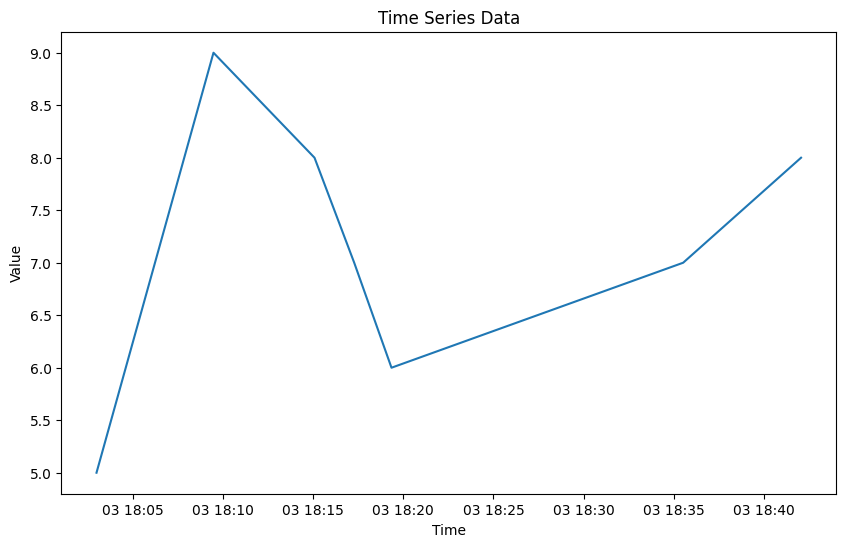

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:14 - cmdstanpy - INFO - Chain [1] start proces

45


19:12:14 - cmdstanpy - INFO - Chain [1] done processing


                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:15:07  7.711552    6.964809    8.464331
1 2012-04-03 18:15:33  7.723253    7.037896    8.401710
2 2012-04-03 18:24:02  7.952329    7.236281    8.702023
3 2012-04-03 18:36:56  8.300669    7.565072    9.012510
4 2012-04-03 18:37:12  8.307870    7.602240    9.079527
5 2012-04-03 18:46:30  8.558999    7.805535    9.303355
6 2012-04-03 18:56:09  8.819578    8.129325    9.557294


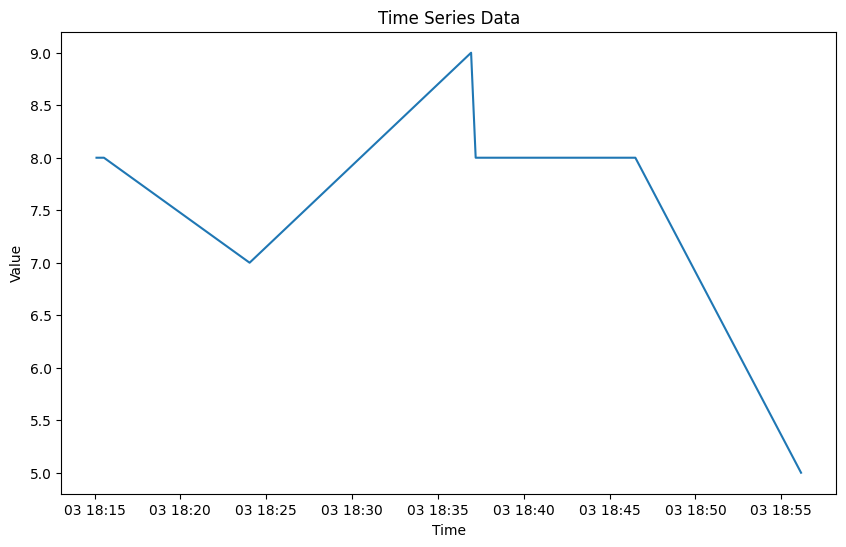

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:14 - cmdstanpy - INFO - Chain [1] start proces

44
                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:02:41  8.301369    6.895943    9.670790
1 2012-04-03 18:07:15  7.146969    5.640741    8.526525
2 2012-04-03 18:08:57  6.717230    5.426460    8.101438
3 2012-04-03 18:12:27  5.832471    4.490733    7.157536
4 2012-04-03 18:39:34 -1.022300   -2.340670    0.306903
5 2012-04-03 18:51:03 -3.925151   -5.309903   -2.546081


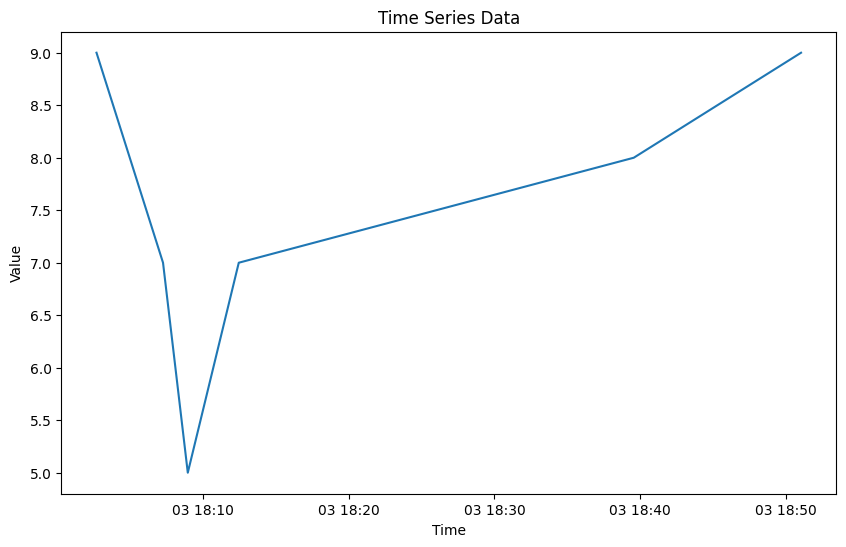

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:14 - cmdstanpy - INFO - Chain [1] start proces

46
                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:04:38  7.415921    5.872485    9.046491
1 2012-04-03 18:11:04  7.713412    6.132880    9.287890
2 2012-04-03 18:14:21  7.865241    6.414144    9.399639
3 2012-04-03 18:39:42  9.037479    7.395762   10.574761


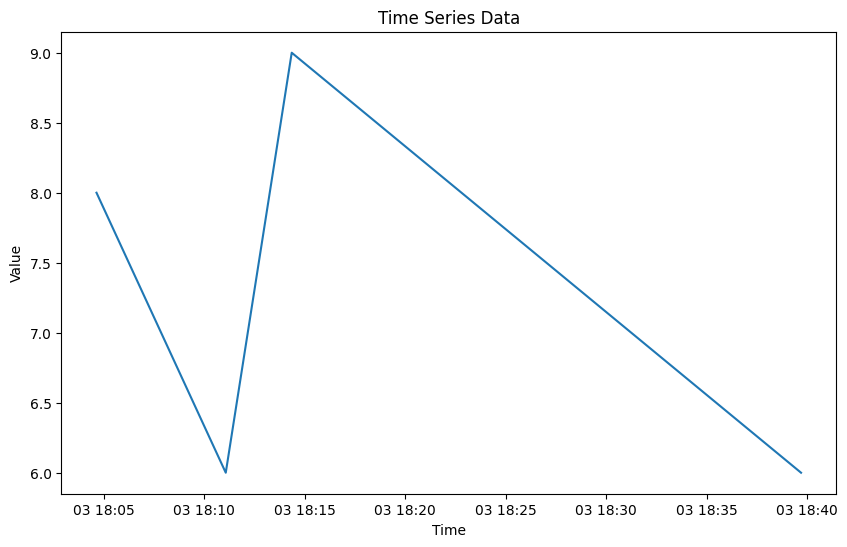

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:15 - cmdstanpy - INFO - Chain [1] start proces

48
                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:13:12  7.000695    5.141802    8.776782
1 2012-04-03 18:27:43  6.997789    5.093587    8.747975
2 2012-04-03 18:42:25  6.994845    5.272557    8.808409
3 2012-04-03 18:57:46  6.991771    5.141671    8.749113


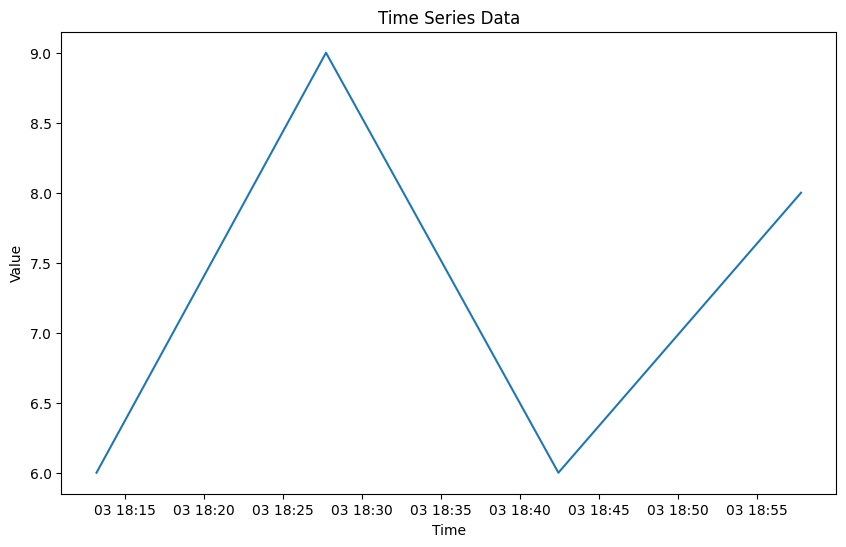

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:15 - cmdstanpy - INFO - Chain [1] start proces

52
                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:04:42  7.077599    6.417227    7.734114
1 2012-04-03 18:19:28  8.370032    7.787889    9.019017
2 2012-04-03 18:21:33  8.552373    7.948865    9.178697
3 2012-04-03 18:24:58  8.851412    8.249071    9.499187


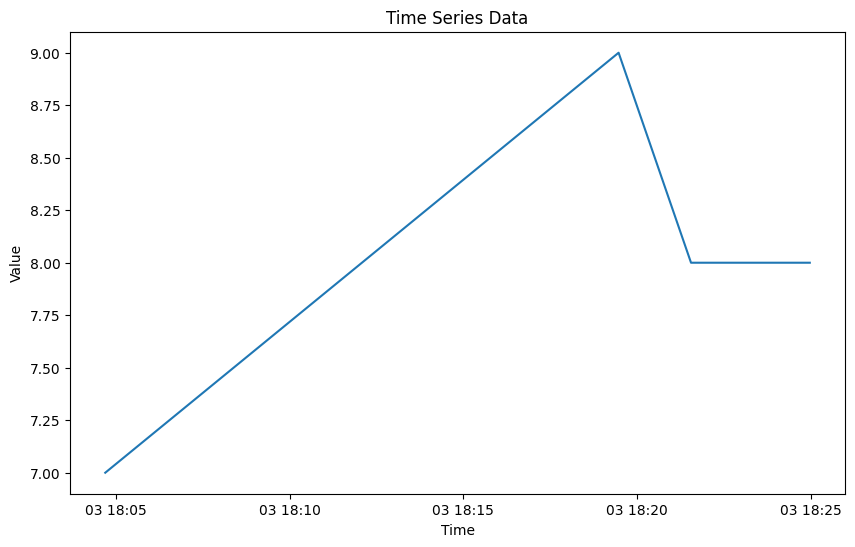

15


/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()


                   ds  yhat  yhat_lower  yhat_upper
0 2012-04-03 18:06:18   7.0         7.0         7.0
1 2012-04-03 18:06:19   7.0         7.0         7.0
2 2012-04-03 18:34:55   7.0         7.0         7.0


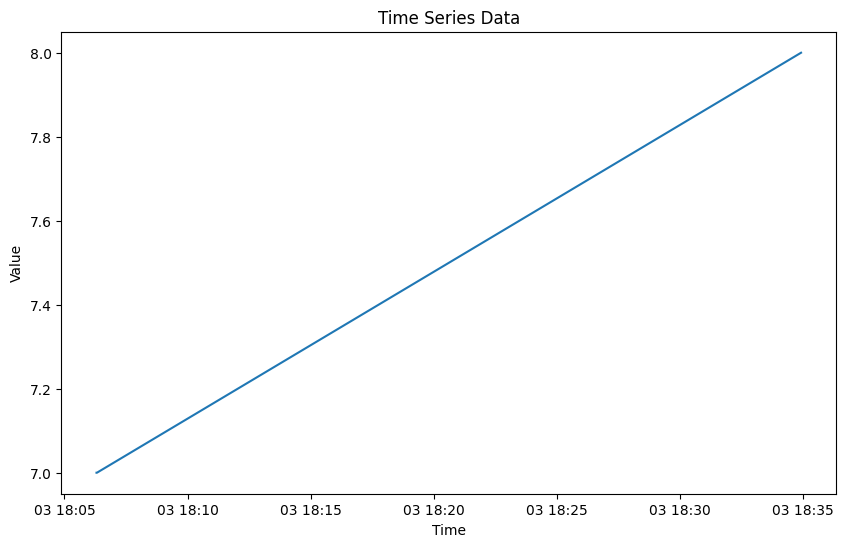

33
                   ds  yhat  yhat_lower  yhat_upper
0 2012-04-03 18:19:25   7.0         7.0         7.0
1 2012-04-03 18:34:10   7.0         7.0         7.0
2 2012-04-03 18:42:32   7.0         7.0         7.0


/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()


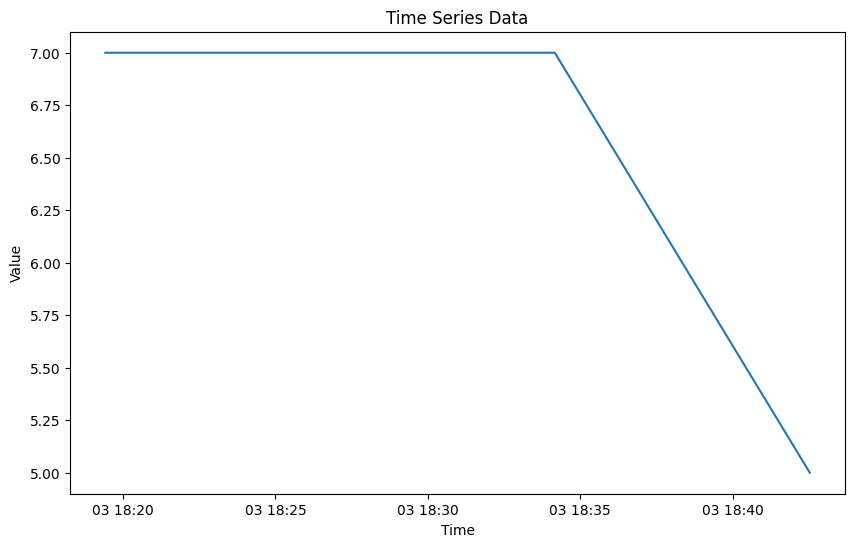

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:15 - cmdstanpy - INFO - Chain [1] start proces

38


19:12:15 - cmdstanpy - INFO - Chain [1] done processing


                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:00:09  9.000000    9.000000    9.000000
1 2012-04-03 18:02:24  8.000000    8.000000    8.000000
2 2012-04-03 18:09:06  5.022222    5.022222    5.022222


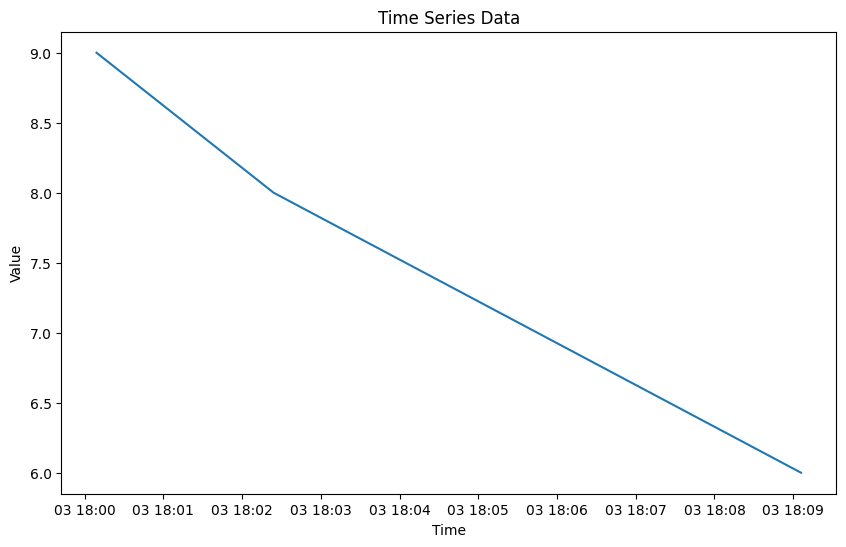

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:16 - cmdstanpy - INFO - Chain [1] start proces

53


19:12:17 - cmdstanpy - INFO - Chain [1] done processing


                   ds     yhat  yhat_lower  yhat_upper
0 2012-04-03 18:31:32  8.00000     8.00000     8.00000
1 2012-04-03 18:32:11  7.00000     7.00000     7.00000
2 2012-04-03 18:33:49  4.48718     4.48718     4.48718


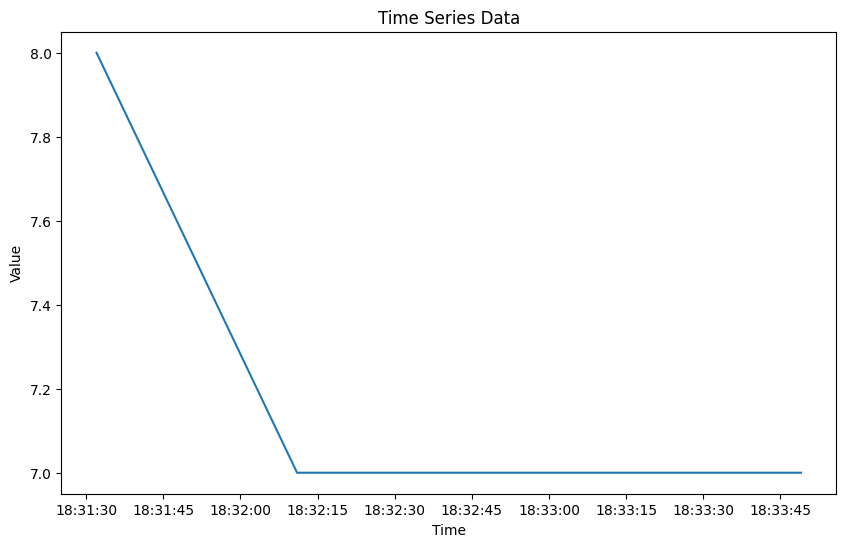

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:17 - cmdstanpy - INFO - Chain [1] start proces

63


19:12:18 - cmdstanpy - INFO - Chain [1] done processing


                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:10:39  7.000000    7.000000    7.000000
1 2012-04-03 18:16:10  6.000000    6.000000    6.000000
2 2012-04-03 18:47:11  0.377643    0.377643    0.377643


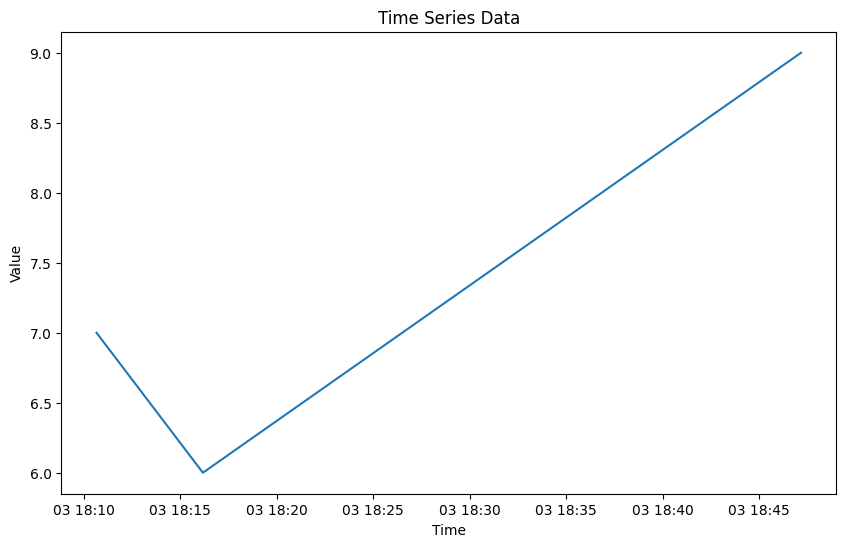

/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/cf/r4p3x0254q3ggfjsf3fcvz3w0000gn/T/ipykernel_7282/3853519538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
19:12:18 - cmdstanpy - INFO - Chain [1] start proces

71


19:12:18 - cmdstanpy - INFO - Chain [1] done processing


                   ds      yhat  yhat_lower  yhat_upper
0 2012-04-03 18:10:04  8.000000    8.000000    8.000000
1 2012-04-03 18:16:19  6.000000    6.000000    6.000000
2 2012-04-03 18:49:59 -4.773333   -4.773333   -4.773333


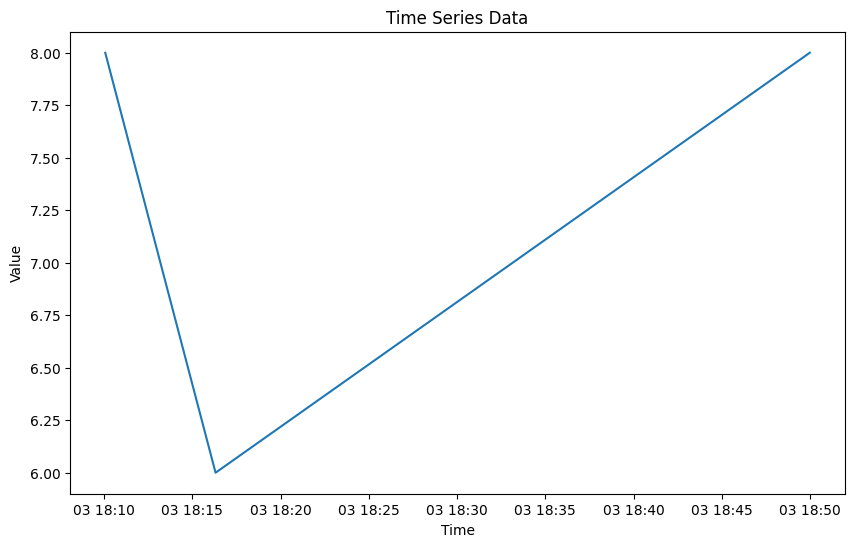

In [22]:
def predict(target_loc):

    filtered_data = df[df['location'] == target_loc]

    filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
    filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()

    grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
    
    # Split 80% train, 20% test
    filtered_data = filtered_data.sort_values("appear_time")
    train_size = int(len(filtered_data) * 0.8)
    train = filtered_data.iloc[:train_size]
    test = filtered_data.iloc[train_size:]
    model = Prophet()
    # Fit the model
    model.fit(train.rename(columns={"appear_time": "ds", "reward": "y"}))

    #Create exact future data frames from appear_time of tasklogs
    future = pd.DataFrame({'ds': filtered_data['appear_time'].values})

    # Make predictions 
    forecast = model.predict(future) 
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data["appear_time"], filtered_data["reward"])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

for loc in target_locs:
    print(loc)
    predict(loc)

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:39 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:03:00   6.687065    5.107509    8.143618
1  2012-04-03 18:09:29   6.858106    5.362569    8.397253
2  2012-04-03 18:15:05   7.005843    5.467679    8.575214
3  2012-04-03 18:17:17   7.063882    5.653145    8.584090
4  2012-04-03 18:19:21   7.118404    5.619639    8.637893
5  2012-04-03 18:35:31   7.544906    5.948371    9.068005
6  2012-04-03 18:42:03   7.717266    6.149613    9.191152
7  2012-04-03 18:52:03   7.981082    6.408937    9.469849
8  2012-04-03 19:02:03   8.244897    6.743026    9.714909
9  2012-04-03 19:12:03   8.508713    7.019228   10.072307
10 2012-04-03 19:22:03   8.772529    7.152164   10.225560
11 2012-04-03 19:32:03   9.036345    7.503153   10.522505
12 2012-04-03 19:42:03   9.300161    7.666608   10.787920
13 2012-04-03 19:52:03   9.563976    8.177242   11.158004
14 2012-04-03 20:02:03   9.827792    8.258904   11.215734
15 2012-04-03 20:12:03  10.091608    8.578117   11.609482
16 2012-04-03 

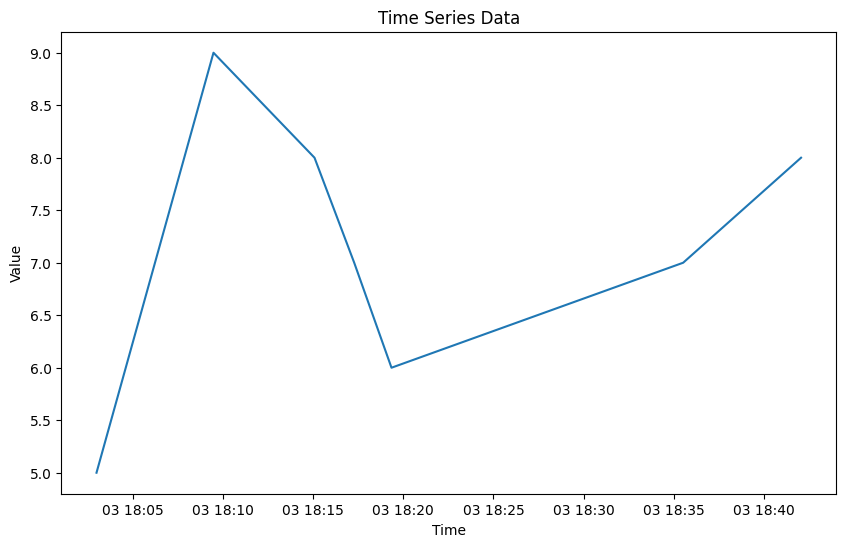

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:15:07  8.261380    6.990166    9.638852
1  2012-04-03 18:15:33  8.244659    6.960999    9.526748
2  2012-04-03 18:24:02  7.917296    6.587638    9.339424
3  2012-04-03 18:36:56  7.419500    6.157293    8.692749
4  2012-04-03 18:37:12  7.409210    6.218241    8.710658
5  2012-04-03 18:46:30  7.050329    5.751021    8.437251
6  2012-04-03 18:56:09  6.677943    5.389429    7.975779
7  2012-04-03 19:06:09  6.292050    4.898254    7.671500
8  2012-04-03 19:16:09  5.906157    4.557130    7.294158
9  2012-04-03 19:26:09  5.520265    4.208095    6.888866
10 2012-04-03 19:36:09  5.134372    3.802947    6.461436
11 2012-04-03 19:46:09  4.748479    3.417777    6.066316
12 2012-04-03 19:56:09  4.362587    3.108729    5.645819
13 2012-04-03 20:06:09  3.976694    2.546420    5.230280
14 2012-04-03 20:16:09  3.590801    2.219047    4.862666
15 2012-04-03 20:26:09  3.204909    1.893837    4.555151
16 2012-04-03 20:36:09  2.81901

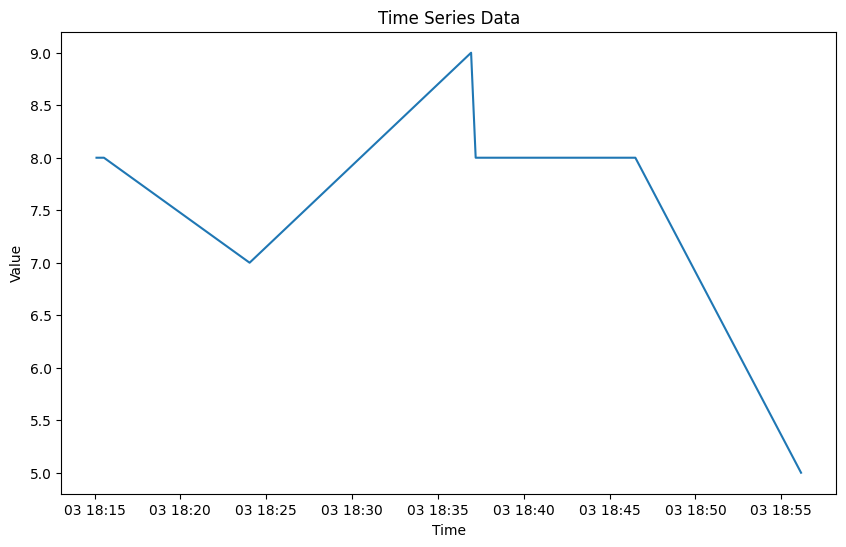

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:41   6.893930    5.284404    8.365924
1  2012-04-03 18:07:15   7.050599    5.549186    8.501392
2  2012-04-03 18:08:57   7.108920    5.626710    8.679891
3  2012-04-03 18:12:27   7.228995    5.675487    8.846835
4  2012-04-03 18:39:34   8.159286    6.608928    9.692957
5  2012-04-03 18:51:03   8.553245    7.009759   10.076824
6  2012-04-03 19:01:03   8.896315    7.250035   10.533586
7  2012-04-03 19:11:03   9.239384    7.609338   10.804058
8  2012-04-03 19:21:03   9.582454    8.031883   11.246828
9  2012-04-03 19:31:03   9.925524    8.229232   11.464413
10 2012-04-03 19:41:03  10.268594    8.715716   11.840978
11 2012-04-03 19:51:03  10.611664    9.107518   12.154916
12 2012-04-03 20:01:03  10.954734    9.417940   12.541583
13 2012-04-03 20:11:03  11.297804    9.762214   12.873910
14 2012-04-03 20:21:03  11.640874   10.037621   13.170214
15 2012-04-03 20:31:03  11.983944   10.469227   13.420392


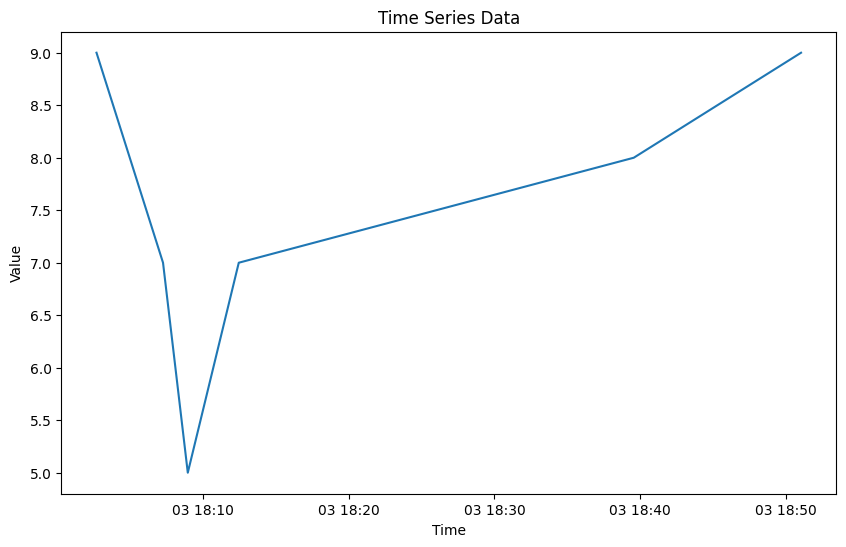

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:38  7.870510    6.265610    9.325849
1  2012-04-03 18:11:04  7.557143    6.114741    9.018317
2  2012-04-03 18:14:21  7.397212    5.881444    8.793951
3  2012-04-03 18:39:42  6.162415    4.743536    7.653431
4  2012-04-03 18:49:42  5.675316    4.257632    7.103362
5  2012-04-03 18:59:42  5.188216    3.696430    6.681762
6  2012-04-03 19:09:42  4.701117    3.269957    6.158379
7  2012-04-03 19:19:42  4.214018    2.758214    5.651284
8  2012-04-03 19:29:42  3.726918    2.271064    5.123322
9  2012-04-03 19:39:42  3.239819    1.770200    4.758467
10 2012-04-03 19:49:42  2.752720    1.383321    4.177905
11 2012-04-03 19:59:42  2.265620    0.870225    3.762085
12 2012-04-03 20:09:42  1.778521    0.406071    3.148043
13 2012-04-03 20:19:42  1.291422   -0.136195    2.765350


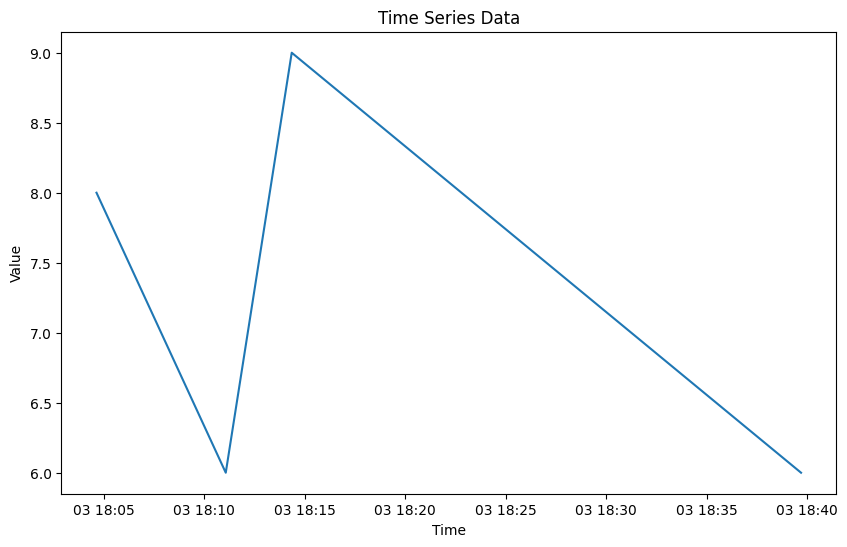

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:13:12  6.786855    5.328753    8.311847
1  2012-04-03 18:27:43  7.087724    5.434885    8.701893
2  2012-04-03 18:42:25  7.392393    5.861308    8.986325
3  2012-04-03 18:57:46  7.710534    6.061675    9.149473
4  2012-04-03 19:07:46  7.917792    6.318089    9.437299
5  2012-04-03 19:17:46  8.125049    6.473413    9.740786
6  2012-04-03 19:27:46  8.332307    6.773688    9.991943
7  2012-04-03 19:37:46  8.539565    6.955832   10.124608
8  2012-04-03 19:47:46  8.746823    7.196842   10.214605
9  2012-04-03 19:57:46  8.954081    7.363804   10.508926
10 2012-04-03 20:07:46  9.161339    7.463016   10.769060
11 2012-04-03 20:17:46  9.368597    7.778588   10.922389
12 2012-04-03 20:27:46  9.575854    7.911242   11.196626
13 2012-04-03 20:37:46  9.783112    8.241911   11.359854


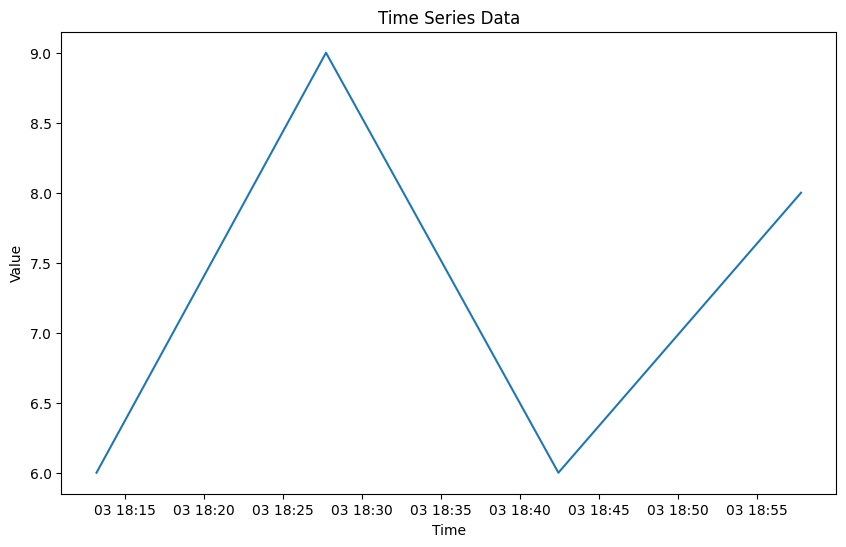

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:42   7.200350    6.552922    7.875871
1  2012-04-03 18:19:28   8.110440    7.485667    8.782713
2  2012-04-03 18:21:33   8.238839    7.575648    8.891244
3  2012-04-03 18:24:58   8.449413    7.750516    9.107828
4  2012-04-03 18:34:58   9.065726    8.421504    9.784828
5  2012-04-03 18:44:58   9.682040    9.047171   10.351794
6  2012-04-03 18:54:58  10.298354    9.629640   10.984230
7  2012-04-03 19:04:58  10.914668   10.268629   11.543646
8  2012-04-03 19:14:58  11.530981   10.885107   12.212114
9  2012-04-03 19:24:58  12.147295   11.490236   12.752996
10 2012-04-03 19:34:58  12.763609   12.078026   13.389312
11 2012-04-03 19:44:58  13.379923   12.761945   14.080793
12 2012-04-03 19:54:58  13.996237   13.331204   14.740251
13 2012-04-03 20:04:58  14.612550   13.915947   15.277631


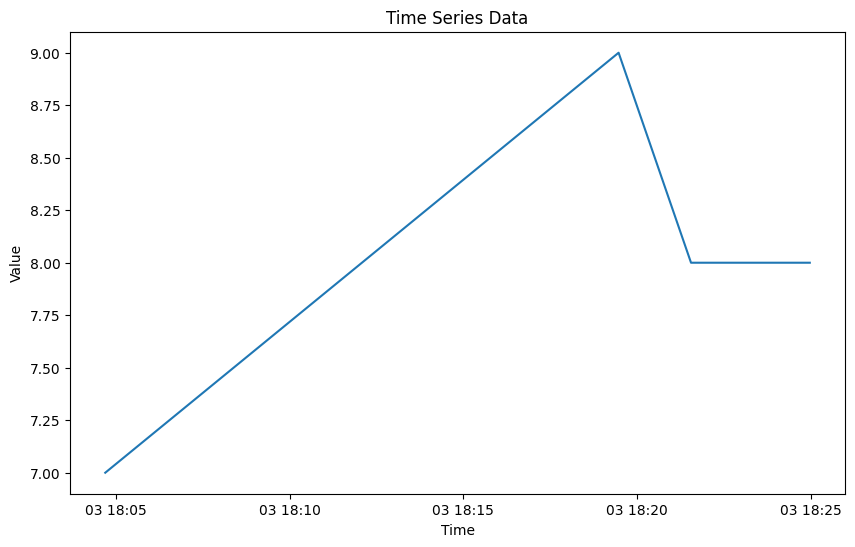

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:06:18   7.000000    7.000000    7.000000
1  2012-04-03 18:06:19   7.000000    7.000000    7.000000
2  2012-04-03 18:34:55   8.000000    8.000000    8.000000
3  2012-04-03 18:44:55   8.349650    8.271756    8.462486
4  2012-04-03 18:54:55   8.699301    8.317986    9.123747
5  2012-04-03 19:04:55   9.048951    8.310482    9.840352
6  2012-04-03 19:14:55   9.398601    8.202007   10.735212
7  2012-04-03 19:24:55   9.748252    7.977442   11.669271
8  2012-04-03 19:34:55  10.097902    7.567430   12.781514
9  2012-04-03 19:44:55  10.447552    7.273262   13.930901
10 2012-04-03 19:54:55  10.797203    6.788720   15.149692
11 2012-04-03 20:04:55  11.146853    6.147462   16.388720
12 2012-04-03 20:14:55  11.496503    5.499489   17.477074


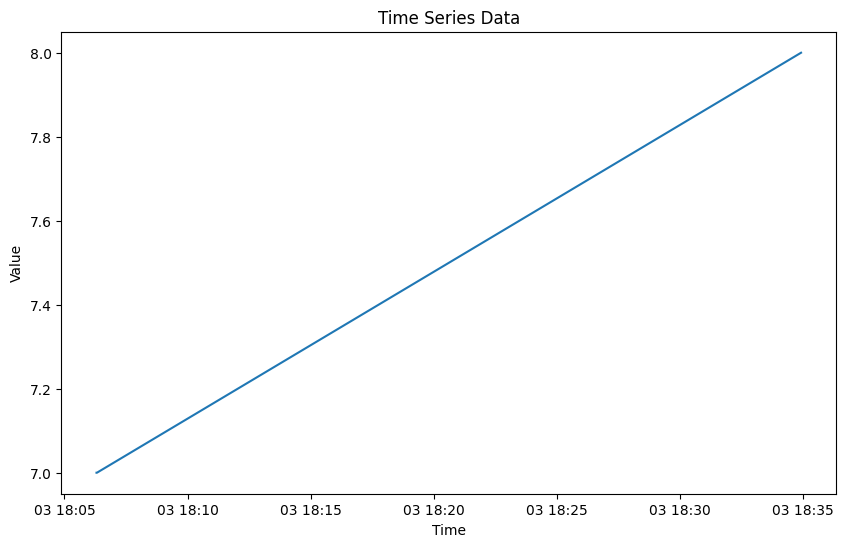

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:42 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:19:25  7.297838    6.553111    8.137682
1  2012-04-03 18:34:10  6.169930    5.404911    6.929138
2  2012-04-03 18:42:32  5.530145    4.758086    6.283569
3  2012-04-03 18:52:32  4.765461    4.060122    5.543689
4  2012-04-03 19:02:32  4.000778    3.228278    4.729405
5  2012-04-03 19:12:32  3.236094    2.496591    4.010461
6  2012-04-03 19:22:32  2.471411    1.691345    3.221773
7  2012-04-03 19:32:32  1.706727    0.936114    2.506665
8  2012-04-03 19:42:32  0.942044    0.205127    1.818260
9  2012-04-03 19:52:32  0.177360   -0.610142    0.954593
10 2012-04-03 20:02:32 -0.587323   -1.365406    0.143010
11 2012-04-03 20:12:32 -1.352007   -2.100095   -0.601633
12 2012-04-03 20:22:32 -2.116690   -2.886662   -1.374003


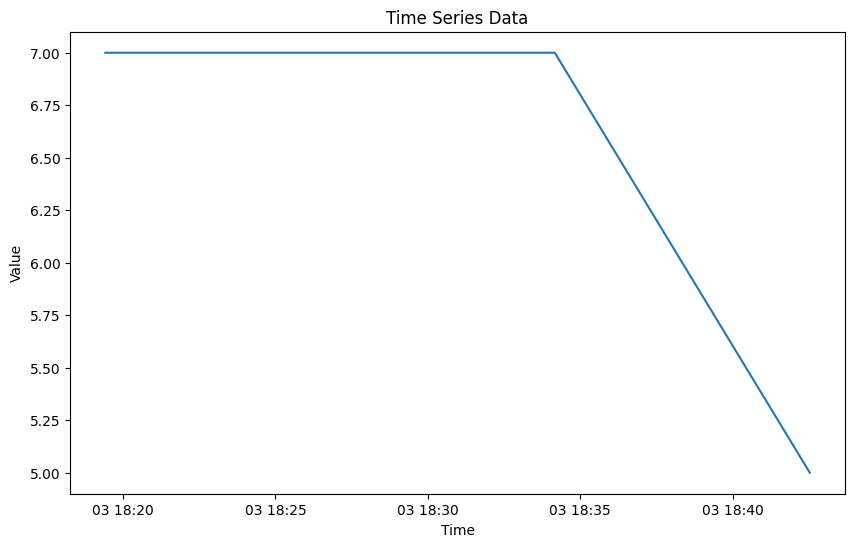

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:43 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:00:09   9.000000    9.000000    9.000000
1  2012-04-03 18:02:24   8.000000    8.000000    8.000000
2  2012-04-03 18:09:06   6.000000    6.000000    6.000000
3  2012-04-03 18:19:06   3.014925    1.761427    4.257593
4  2012-04-03 18:29:06   0.029851   -3.904921    4.032675
5  2012-04-03 18:39:06  -2.955224  -10.505630    4.405283
6  2012-04-03 18:49:06  -5.940299  -17.889863    5.562405
7  2012-04-03 18:59:06  -8.925373  -25.841555    8.034884
8  2012-04-03 19:09:06 -11.910448  -34.580171   10.002079
9  2012-04-03 19:19:06 -14.895523  -43.360831   12.671531
10 2012-04-03 19:29:06 -17.880597  -51.746323   16.696730
11 2012-04-03 19:39:06 -20.865672  -61.942507   20.869053
12 2012-04-03 19:49:06 -23.850746  -72.646126   26.418802


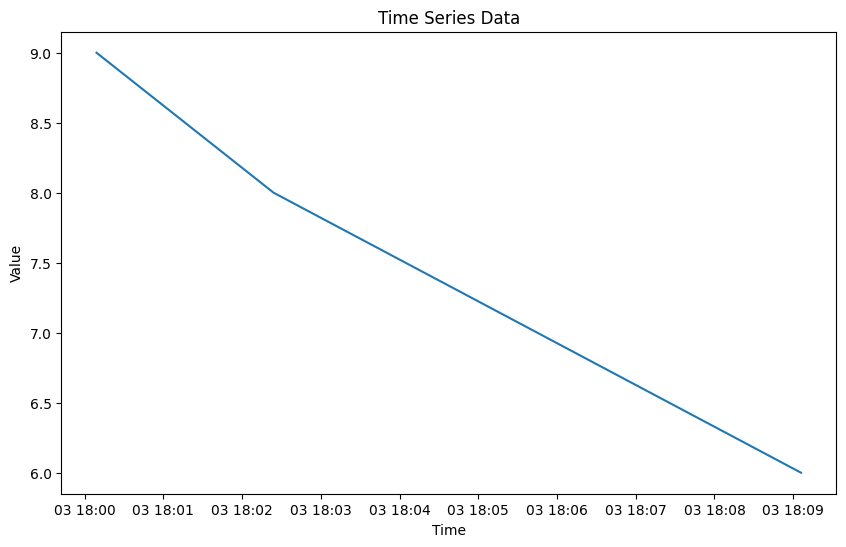

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:44 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:31:32   7.677347    7.274062    8.119743
1  2012-04-03 18:32:11   7.447765    7.023796    7.860463
2  2012-04-03 18:33:49   6.870867    6.427331    7.289333
3  2012-04-03 18:43:49   3.338837    2.914216    3.741838
4  2012-04-03 18:53:49  -0.193193   -0.623715    0.216551
5  2012-04-03 19:03:49  -3.725224   -4.131616   -3.308059
6  2012-04-03 19:13:49  -7.257254   -7.678738   -6.851514
7  2012-04-03 19:23:49 -10.789284  -11.212157  -10.352366
8  2012-04-03 19:33:49 -14.321314  -14.756137  -13.896623
9  2012-04-03 19:43:49 -17.853345  -18.257241  -17.468672
10 2012-04-03 19:53:49 -21.385375  -21.810314  -20.938061
11 2012-04-03 20:03:49 -24.917405  -25.348868  -24.512707
12 2012-04-03 20:13:49 -28.449435  -28.826450  -28.022018


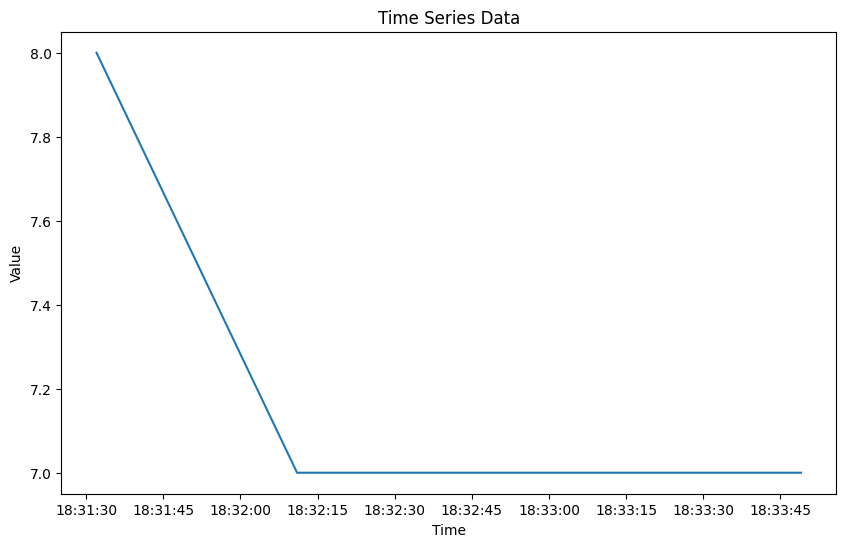

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:44 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:39   6.364567    5.691811    7.078077
1  2012-04-03 18:16:10   6.745721    6.044220    7.526469
2  2012-04-03 18:47:11   8.888708    8.139445    9.608887
3  2012-04-03 18:57:11   9.579623    8.844959   10.341315
4  2012-04-03 19:07:11  10.270538    9.510313   11.003789
5  2012-04-03 19:17:11  10.961452   10.230162   11.700570
6  2012-04-03 19:27:11  11.652367   10.954214   12.397348
7  2012-04-03 19:37:11  12.343282   11.542363   13.049997
8  2012-04-03 19:47:11  13.034196   12.256152   13.767304
9  2012-04-03 19:57:11  13.725111   13.010027   14.463427
10 2012-04-03 20:07:11  14.416026   13.698883   15.152461
11 2012-04-03 20:17:11  15.106940   14.364107   15.807855
12 2012-04-03 20:27:11  15.797855   15.080350   16.477469


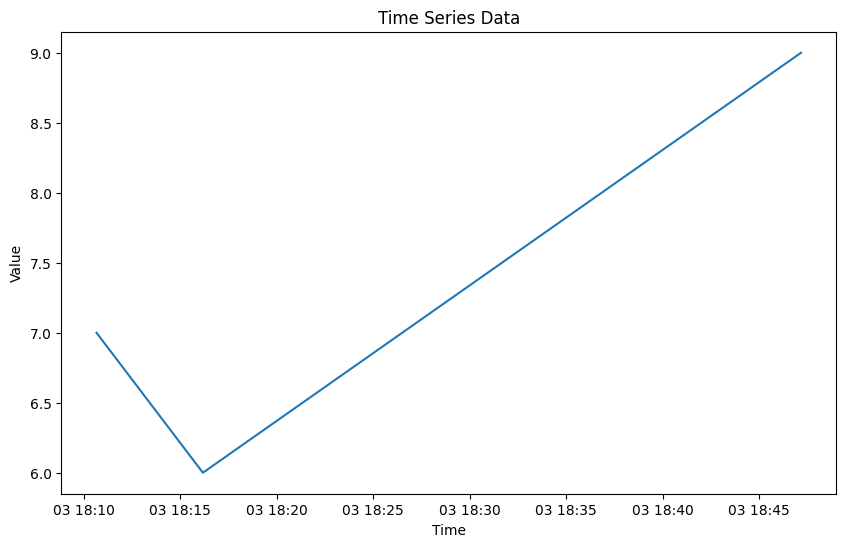

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:45 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:04  7.026508    5.880769    8.140859
1  2012-04-03 18:16:19  7.150668    6.023817    8.121103
2  2012-04-03 18:49:59  7.819480    6.750006    8.900401
3  2012-04-03 18:59:59  8.018136    6.951919    9.093861
4  2012-04-03 19:09:59  8.216793    7.109981    9.303630
5  2012-04-03 19:19:59  8.415450    7.302685    9.579872
6  2012-04-03 19:29:59  8.614107    7.529550    9.732499
7  2012-04-03 19:39:59  8.812764    7.698434    9.915211
8  2012-04-03 19:49:59  9.011421    7.936982   10.095095
9  2012-04-03 19:59:59  9.210078    8.094091   10.283381
10 2012-04-03 20:09:59  9.408734    8.250960   10.489937
11 2012-04-03 20:19:59  9.607391    8.458555   10.723318
12 2012-04-03 20:29:59  9.806048    8.688935   10.878175


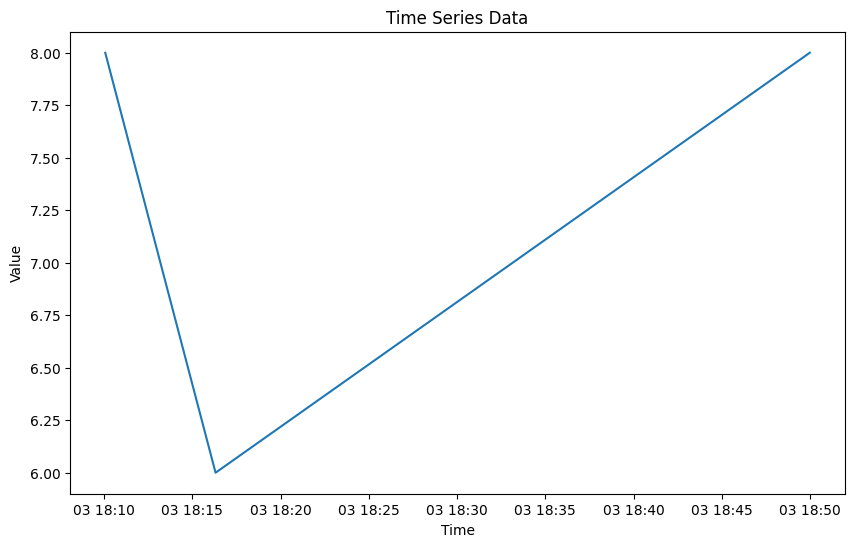

In [80]:
def predict(target_loc):

    filtered_data = df[df['location'] == target_loc]

    

    filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
    filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
    grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
    model = Prophet()

    # Fit the model
    model.fit(filtered_data.rename(columns={"appear_time": "ds", "reward": "y"}))

    # Create future dates dataframe 
    future = model.make_future_dataframe(periods=10, freq='10min') 

    # Make predictions 
    forecast = model.predict(future) 
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data["appear_time"], filtered_data["reward"])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

for loc in target_locs:
    predict(loc)

In [ ]:
target_loc = 43

filtered_data = df[df[loc] == target_loc]

print(filtered_data)
print(type(filtered_data))

filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
model = Prophet()

# Fit the model
model.fit(filtered_data.rename(columns={"appear_time": "ds", "reward": "y"}))

# Create future dates dataframe 
future = model.make_future_dataframe(periods=10, freq='10min') 

# Make predictions 
forecast = model.predict(future) 
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["appear_time"], filtered_data["reward"])
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [10]:
import sys
!{sys.executable} -m pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 7.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 8.1 MB/s eta 0:00:00a 0:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File

In [6]:
# Filter data for a specific location
# Using one of the locations with high check-in counts from the duplicates DataFrame
target_lat = 40.750795
target_lon = -73.993576

# Allow for some small variation in coordinates (within ~10 meters)
tolerance = 0.0001

# Filter the data
filtered_data = df[
    (df[lat_col].between(target_lat - tolerance, target_lat + tolerance)) & 
    (df[lon_col].between(target_lon - tolerance, target_lon + tolerance))
]

# Save to new CSV file
filtered_data.to_csv('filtered_location_data.csv', index=False)

print(f"Found {len(filtered_data)} records for location (lat={target_lat}, lon={target_lon})")
print(f"Data saved to filtered_location_data.csv")

Found 1156 records for location (lat=40.750795, lon=-73.993576)
Data saved to filtered_location_data.csv


c:\Users\cbassem\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\cbassem\AppData\Local\Temp\ipykernel_22072\3802657395.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")
C:\Users\cbassem\AppData\Local\Temp\ipykernel_22072\3802657395.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
17:21:03 - cmdstanpy - INFO - Chain [1] start processing
17:21:04 - cmdstanpy - INFO - Chain [1] done processing


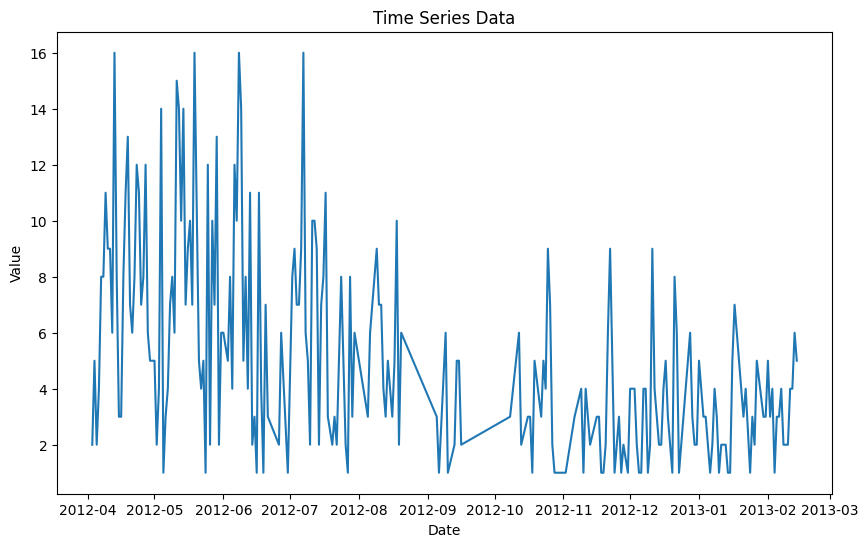

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# data = pd.read_csv('filtered_location_data.csv')
# ts_col = data.columns[7]
# data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")

# data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
# grouped = data.groupby(["_period"]).size().rename("count").reset_index()

# Initialize the model
model = Prophet()

# Fit the model
# model.fit(grouped.rename(columns={"_period": "ds", "count": "y"}))

# Create future dates dataframe 
future = model.make_future_dataframe(periods=20) # 90 days into the future, depends on your choice

# Make predictions 
forecast = model.predict(future) 

# View the forecast 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

plt.figure(figsize=(10, 6))
plt.plot(grouped["_period"], grouped["count"])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

C:\Users\cbassem\AppData\Local\Temp\ipykernel_17732\2593786689.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")
C:\Users\cbassem\AppData\Local\Temp\ipykernel_17732\2593786689.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()


Root Mean Squared Error: 2.482001268243581


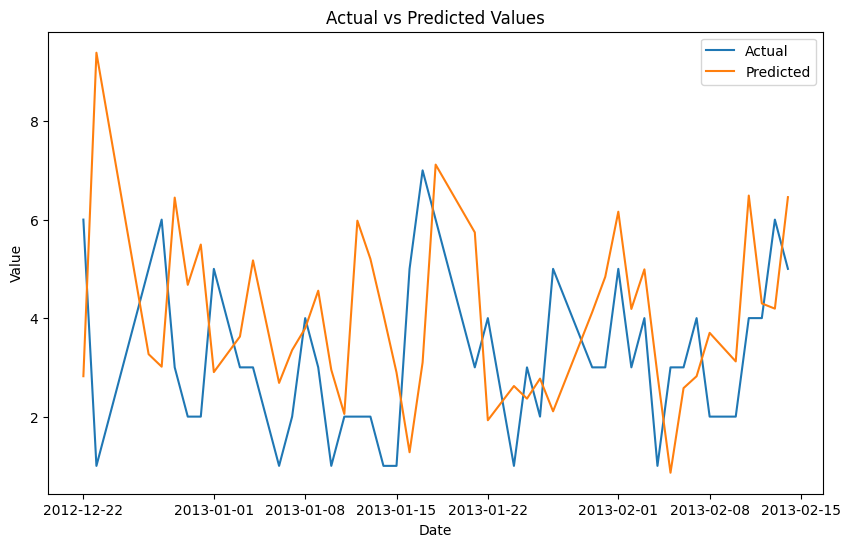

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv('filtered_location_data.csv')
data = pd.read_csv('filtered_location_data.csv')
ts_col = data.columns[7]
data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")

data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
grouped = data.groupby(["_period"]).size().rename("count").reset_index()
grouped.set_index('_period', inplace=True)

# Create lag features
def create_lag_features(df, lags, target_col):
  for lag in range(1, lags + 1):
    df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
  df.dropna(inplace=True)
  return df

grouped = create_lag_features(grouped, lags=10, target_col='count')
# Split data into features and target
X = grouped.drop(columns=['count'])
y = grouped['count']

# Split data into train and test sets
train_size = int(len(grouped) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# print (X_train)# Initialize the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()